In [1]:
from pyALT import *
import pyALT.io as io
from matplotlib import pyplot as plt
G = io.load('meso_cortex.pk')

In [7]:
z= set([G.node[xx]['majorRegion'] for xx in G.nodes()])

In [17]:
w = '''
'Cerebellar Cortex',
 'Cerebellar Nuclei',
 'Cortical Subplate',
 'Hippocampal Formation',
 'Hypothalamus',
 'Isocortex',
 'Medulla',
 'Midbrain',
 'Olfactory Areas',
 'Pallidum',
 'Pons',
 'Striatum',
 'Thalamus'
 '''.split(',')
allRegions = [ww.strip("' \n,") for ww in w]
allRegions

['Cerebellar Cortex',
 'Cerebellar Nuclei',
 'Cortical Subplate',
 'Hippocampal Formation',
 'Hypothalamus',
 'Isocortex',
 'Medulla',
 'Midbrain',
 'Olfactory Areas',
 'Pallidum',
 'Pons',
 'Striatum',
 'Thalamus']

In [28]:
import numpy as np
t = [xx for xx in nx.clustering(G.to_undirected()).values()]
print(np.mean(t))
print(np.median(t))
print(np.std(t))

0.6049617394048512
0.6222222222222222
0.1627366576456456


In [30]:
G.size()/67/66

0.13930348258706468

In [31]:
t = []
for n1 in G.nodes():
    for n2 in G.nodes():
        if n1==n2:continue
        try:
            t += list(nx.all_shortest_paths(G,n1,n2))
        except:
            pass
t = [len(xx) for xx in t]
print(np.mean(t))
print(np.median(t))
print(np.std(t))
print(np.max(t))

4.107951553449184
4.0
0.9938912763296867
7


In [2]:
thresholds = {'VISp':4,'AUDp':1,'GU':2.5,'SSp-ul':2.5,'SSp-tr':2.5,
              'SSp-m':4,'SSp-bfd':4,'SSp-ll':1.5,'SSp-n':0.98,'MOB':0.46}
srcs = ['SSp-ll','SSp-tr','VISp','SSp-bfd','SSp-ul','SSp-m','AUDp','SSp-n','GU','MOB']

In [10]:
D = defaultdict(float)
for src in srcs:
    for w in G.nodes():
        try:
            D[w] += (1 if G[src][w]['weight']>0 else 0)
        except KeyError:
            pass

In [53]:
D = defaultdict(float)
D =set([])
for src in srcs:
    for w in G.nodes():
        try:
            if G[src][w]['weight']>0 and w not in srcs:
#                 D[w] += G[src][w]['weight']/G[src][w]['distance']
                D.add(w)
#             for v in G.nodes():
#                 if v==w and v==src:
#                     continue
#                 try:
#                     if G[w][v]['weight']>0:
#                         D[v] += G[w][v]['weight']/G[src][w]['distance']
#                 except KeyError:
#                     pass
        except KeyError:
            pass

In [22]:
from collections import Counter

In [55]:
z = set([])
for x,_ in core:
    z.add(x)

In [57]:
print(len(z))
print(len(z.intersection(D)))

25
23


In [40]:
L = ALT(G)
for src in srcs:
    L.add_source(src)
    L.set_theta(src,0.98)
L.set_theta('MOB',0.46)
L.run()
L.form_paths()
pc = L.path_centrality()
core = L.core(100)

In [4]:
L.adag_node_locations()
L.locations()

In [32]:
ps = L.P.P
mp = defaultdict(list)
for w in ps:
    pa = ps[w]
    mp[pa[0]]+=[len(pa)-1]

In [35]:
depths = []
pl = []
for src in srcs:
    depths += [max(L(src).hc.keys())]
    pl += [np.median(mp[src])]

In [36]:
pl

[4.0, 4.0, 4.0, 2.5, 3.0, 4.0, 3.0, 5.0, 3.0, 5.0]

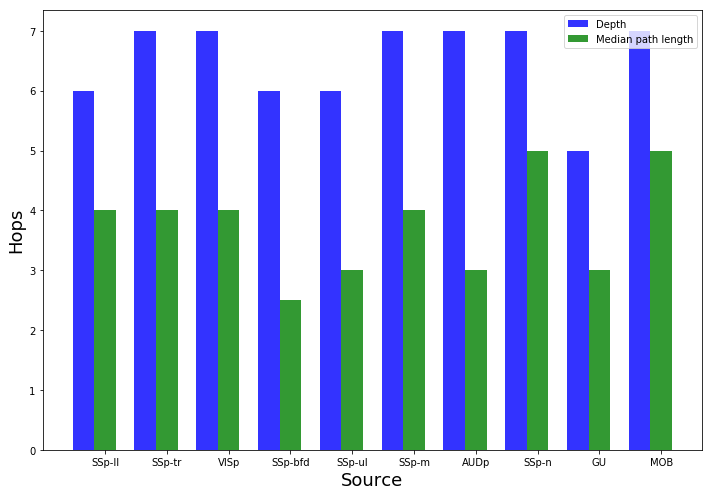

In [44]:
# data to plot

n_groups = 10
 
# create plot
plt.subplots(figsize=(10,7))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, depths, bar_width,
alpha=opacity,
color='b',
label='Depth')
 
rects2 = plt.bar(index + bar_width, pl, bar_width,
alpha=opacity,
color='g',
label='Median path length')
 
plt.xlabel('Source',fontsize=18)
plt.ylabel('Hops',fontsize=18)
plt.xticks(index + bar_width, srcs)
plt.legend()
 
plt.tight_layout()
plt.show()

In [49]:
nl = [[] for i in range(7)]
for src in srcs:
    hc = L(src).hc
    for l in hc:
        if l==0:continue
        nl[l-1] += [len(hc[l])]

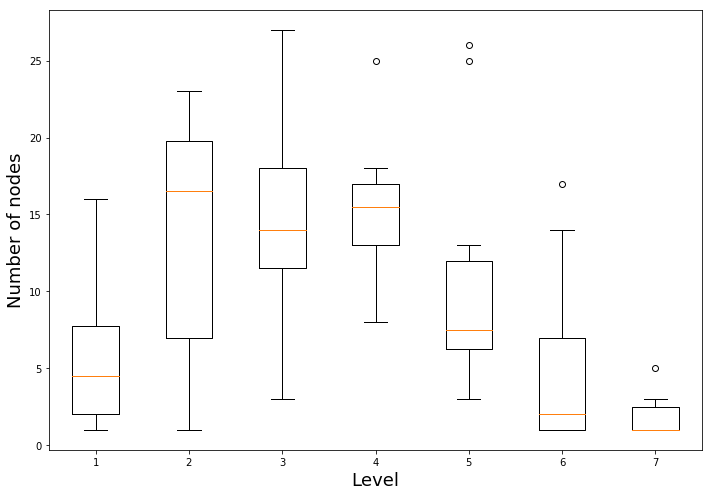

In [55]:
plt.subplots(figsize=(10,7))
plt.boxplot(nl, 0)
plt.xlabel('Level',fontsize=18)
plt.ylabel('Number of nodes',fontsize=18)
 
plt.tight_layout()

In [47]:
hc = L(src).hc
hc

{0: ['SSp-ll'],
 1: ['SSp-tr', 'PTLp', 'ORBvl', 'AUDv', 'AUDp', 'AUDd', 'ACAd'],
 2: ['VISal',
  'VISpm',
  'VISp',
  'VISl',
  'VISam',
  'RSPv',
  'RSPd',
  'RSPagl',
  'POST',
  'VISC',
  'SSs',
  'SSp-bfd',
  'LA',
  'BLA',
  'TEa',
  'PL',
  'ORBm',
  'ORBl',
  'MOs',
  'ILA',
  'ACAv'],
 3: ['VISpl',
  'PRE',
  'AIp',
  'PERI',
  'PAA',
  'PA',
  'NLOT',
  'EPv',
  'ECT',
  'AIv',
  'MOp',
  'FRP',
  'CLA',
  'AOB'],
 4: ['ENTm',
  'SUBd',
  'ENTl',
  'CA2',
  'TR',
  'COAp',
  'COAa',
  'BMA',
  'PIR',
  'DP',
  'SSp-ul',
  'SSp-n',
  'SSp-m',
  'GU',
  'AId',
  'TT',
  'EPd'],
 5: ['SUBv', 'PAR', 'DG', 'CA3', 'CA1', 'AON'],
 6: ['MOB']}

Text(0,0.5,'Frequency')

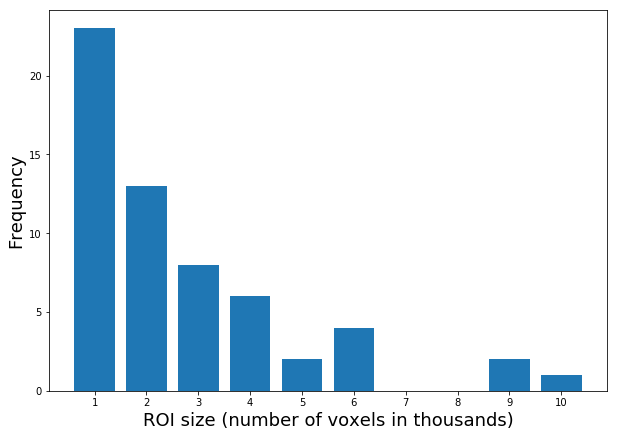

In [38]:
vox = [G.node[xx]['voxels'] for xx in G.nodes()]
q1,q2 = np.percentile(vox,[5,95])
_v = [xx for xx in vox if xx>q1 and xx<q2]
y,x = np.histogram(_v,bins=10)
fig, ax = plt.subplots(figsize=(10,7))
ax.bar(x[1:],y,750)
plt.xticks((x[1:]),[int(xx) for xx in (x[1:]+300)/1000])
plt.xlabel('ROI size (number of voxels in thousands)',fontsize=18)
plt.ylabel('Frequency',fontsize=18)

Calculating best minimal value for power law fit
/anaconda2/envs/py36/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/anaconda2/envs/py36/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


Text(0,0.5,'CCDF')

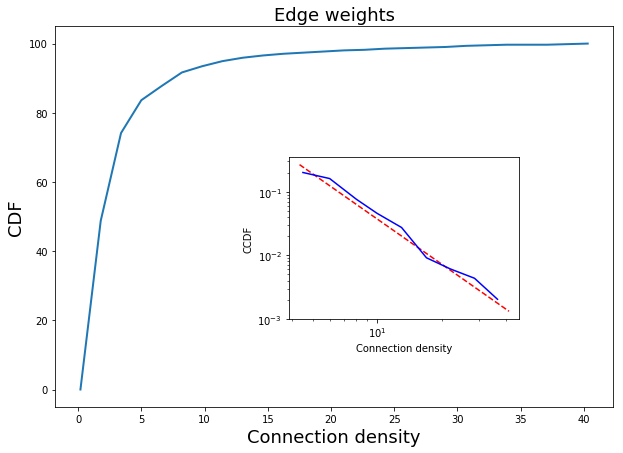

In [111]:
w = [G[v][w]['weight'] for v,w in G.edges()]
q1,q2 = np.percentile(w,[0,99.5])
_v = [xx for xx in w if xx>q1 and xx<q2]
fig, ax = plt.subplots(figsize=(10,7))
y,x = np.histogram(_v,bins=25)
y = np.cumsum(y)
yax = np.hstack(([0],y/np.max(y)))
plt.plot(x[:],100*yax,lw=2)
plt.title('Edge weights',fontsize=18)
plt.xlabel('Connection density',fontsize=18)
plt.ylabel('CDF',fontsize=18)

left, bottom, width, height = [0.45, 0.3, 0.32, 0.32]
ax2 = fig.add_axes([left, bottom, width, height])

w = [G[v][w]['weight'] for v,w in G.edges()]
q1,q2 = np.percentile(w,[0,99.5])
d = [xx for xx in w if xx>q1 and xx<q2]
fit = powerlaw.Fit(np.array(d)+1,discrete=True)
fit.power_law.plot_pdf( color= 'r',linestyle='--',label='fit ccdf')
fit.plot_pdf( color= 'b')
plt.xlabel('Connection density',fontsize=10)
plt.ylabel('CCDF',fontsize=10)

Text(0.5,1,'Edge length')

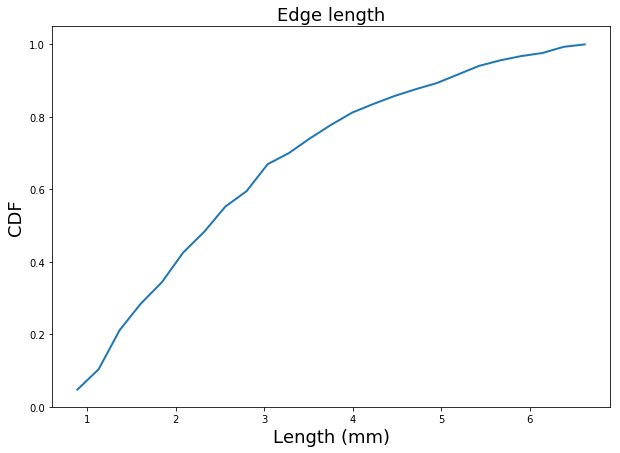

In [108]:
fig, ax = plt.subplots(figsize=(10,7))
w = [G[v][w]['distance'] for v,w in G.edges()]
q1,q2 = np.percentile(w,[2,98])
_v = [xx for xx in w if xx>q1 and xx<q2]
y,x = np.histogram(_v,bins=25)
yax = np.cumsum(y)
plt.plot(x[1:]/1000,yax/yax[-1],lw=2)
plt.xlabel('Length (mm)',fontsize=18)
plt.ylabel('CDF',fontsize=18)
plt.ylim([0,1.05])
plt.title('Edge length',fontsize=18)

In [40]:
import powerlaw

Calculating best minimal value for power law fit
/anaconda2/envs/py36/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/anaconda2/envs/py36/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


alpha=  2.3583745766065296   sigma=  0.1057493173664039


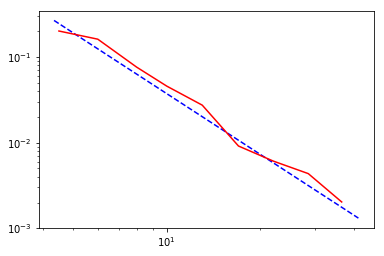

In [102]:
w = [G[v][w]['weight'] for v,w in G.edges()]
q1,q2 = np.percentile(w,[0,99.5])
d = [xx for xx in w if xx>q1 and xx<q2]
fit = powerlaw.Fit(np.array(d)+1,discrete=True)
fit.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
fit.plot_pdf( color= 'r')

In [56]:
fit.__dict__

{'D': 0.19683337082236638,
 'alpha': 1.5264881790516864,
 'data': array([  1.1420977 ,   1.18300185,   1.20010799,   1.20212509,
          1.20889046,   1.22555665,   1.24036255,   1.2439615 ,
          1.25461889,   1.26332682,   1.27355087,   1.28049731,
          1.28646802,   1.29249804,   1.29271741,   1.30088849,
          1.3069539 ,   1.31616178,   1.33238532,   1.33514567,
          1.34766514,   1.35148709,   1.35210318,   1.35309056,
          1.35486635,   1.35539309,   1.35761177,   1.36020936,
          1.36364561,   1.36906985,   1.37773234,   1.37934152,
          1.3835255 ,   1.39367816,   1.39925936,   1.40189062,
          1.40271889,   1.41472134,   1.41479207,   1.42837607,
          1.43945553,   1.46038   ,   1.46335203,   1.46986497,
          1.47298603,   1.47544895,   1.48735648,   1.49036041,
          1.50023262,   1.50063515,   1.50206175,   1.52506057,
          1.54686306,   1.54748988,   1.55080035,   1.55238574,
          1.55401423,   1.55533068,   1